<hr>
<br><br><br>
<div align=center>
<font size=2>
        Trabalho de Conclusão de Curso
    </font>
    <br><br><BR>
    <font size=3>
        Classificação de sentimento em arquivos de áudio<br>a partir da extração de Coeficientes Cepstrais na frequência Mel<br>(MFCCs)
    </font>
    <br><br><BR>
    <font size=2>
        ICMC-USP
    </font>    
</div>
<br><br><br>
<hr>

<br><br>
<a id=menu></a>

[Biblotecas](#libs) <br>
[Dados](#data) <br>
[Pré-processamento](#prep) <br>
[Processamento](#proc) <br>
[Avaliação](#aval) <br>

<br>

<a id='libs'></a>
<h3>Bibliotecas</h3>
<br>
<blockquote>
    <dl>
        <dl>- keras: interface para desenvolvimento de redes neurais.</dl>
        <dl>- librosa: múltiplas funcionalidades para tratamento de arquivos de áudio.</dl>
        <dl>- Matplotlib: criação de gráficos e visuadlzação de dados.</dl>
        <dl>- Numpy: processamento de vetores e matrizes multimensionais.</dl>
        <dl>- Pandas: manipulação e análise de dados tabulares e séries temporais</dl>
        <dl>- Seaborn: criação de gráficos e visualização de dados.</dl>
        <dl>- Sklearn: algoritmos de aprendizado de máquina.</dl>
        <dl>- TensorFlow: desenho de fluxos e processamento de tensores para aprendizado de máquina.</dl>
    </dl>
</blockquote>


In [1]:
import numpy as np 
import pandas as pd 

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt 
import seaborn as sns



<br>
<a id='proc'></a>
<h3>Processamento</h3>

<font size=1>[menu](#menu)</font>

In [2]:
# df.to_csv('../data/voice_features.csv', index=False)
df = pd.read_csv('../data/voice_features_normalized.csv')

In [3]:
# Test just with MEL features
df = pd.concat([df.iloc[:,41:169],df.iloc[:,-8:]], axis=1)
df = df[df.emotion!='neutral']
print(df.shape)
df.head(2)

(1344, 136)


,41,42,43,44,45,46,47,48,49,50,...,167,168,174,175,176,177,178,179,180,emotion
0,0.000092,0.000151,0.000136,0.000907,0.015207,0.042250,0.256988,0.517432,0.130183,0.119377,...,0.000067,0.555700,0.539773,0.53951,0.592600,0.604869,0.615869,0.599911,3000.496656,angry
1,0.000039,0.000053,0.000065,0.000392,0.004423,0.041761,0.167385,0.292937,0.688341,0.518451,...,0.000035,0.550358,0.406826,0.42590,0.472114,0.543731,0.561210,0.558470,2674.064395,fearful


In [4]:
from pycaret.classification import *

In [5]:
clf = setup(df,
            target='emotion',
            train_size=0.8, 
            # normalize=True, 
            # transform_target=True,
            # feature_interaction=True,
            # feature_ratio=True,
            session_id=42)

,Description,Value
0,session_id,42
1,Target,emotion
2,Target Type,Multiclass
3,Label Encoded,"angry: 0, calm: 1, disgust: 2, fearful: 3, happy: 4, sad: 5, surprised: 6"
4,Original Data,"(1344, 136)"
5,Missing Values,False
6,Numeric Features,135
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
get_config('X').head(3)

,41,42,43,44,45,46,47,48,49,50,...,166,167,168,174,175,176,177,178,179,180
0,0.000092,0.000151,0.000136,0.000907,0.015207,0.042250,0.256988,0.517432,0.130183,0.119377,...,0.001566,0.000067,0.555700,0.539773,0.539510,0.592600,0.604869,0.615869,0.599911,3000.496582
1,0.000039,0.000053,0.000065,0.000392,0.004423,0.041761,0.167385,0.292937,0.688341,0.518451,...,0.000548,0.000035,0.550358,0.406826,0.425900,0.472114,0.543731,0.561210,0.558470,2674.064453
2,0.004286,0.001473,0.000439,0.000338,0.000381,0.000275,0.000341,0.000392,0.000676,0.003178,...,0.001780,0.000151,0.668006,0.526457,0.585952,0.646058,0.694795,0.706928,0.716587,3326.805420


In [36]:
top3 = compare_models(sort='AUC', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6160,0.9051,0.6202,0.6240,0.6113,0.5521,0.5546,6.7600
gbc,Gradient Boosting Classifier,0.5319,0.8658,0.5362,0.5349,0.5268,0.4539,0.4557,19.8340
rf,Random Forest Classifier,0.5053,0.8342,0.5103,0.5203,0.5023,0.4233,0.4262,0.3100
et,Extra Trees Classifier,0.5074,0.8319,0.5132,0.5212,0.4993,0.4257,0.4291,0.1570
ada,Ada Boost Classifier,0.2915,0.6510,0.2976,0.2601,0.2550,0.1745,0.1823,0.6920
nb,Naive Bayes,0.2617,0.6343,0.2714,0.2596,0.2261,0.1433,0.1538,0.0260
dt,Decision Tree Classifier,0.3670,0.6303,0.3700,0.3727,0.3648,0.2612,0.2625,0.1330
knn,K Neighbors Classifier,0.2255,0.5971,0.2301,0.2349,0.2124,0.0986,0.1011,0.0640
lda,Linear Discriminant Analysis,0.2872,0.5823,0.2916,0.2728,0.2714,0.1692,0.1710,0.1140
lr,Logistic Regression,0.2457,0.5533,0.2479,0.2450,0.2375,0.1202,0.1213,2.3390


In [26]:
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3663,0.7867,0.3448,0.3303,0.3385,0.2696,0.2733
1,0.4554,0.8512,0.4327,0.4638,0.4231,0.3732,0.3848
2,0.4059,0.8169,0.3853,0.3721,0.3635,0.3153,0.3248
3,0.4356,0.8062,0.4141,0.4096,0.4055,0.3496,0.3556
4,0.4851,0.8367,0.4547,0.4608,0.4559,0.4059,0.4124
5,0.3663,0.7999,0.3407,0.3498,0.3457,0.2679,0.2719
6,0.4257,0.8122,0.4089,0.4780,0.4126,0.3370,0.3432
7,0.4900,0.8511,0.4609,0.4468,0.4428,0.4114,0.4220
8,0.4300,0.8366,0.4038,0.4167,0.4065,0.3421,0.3490
9,0.4300,0.7837,0.4114,0.4650,0.4064,0.3427,0.3489


In [27]:
blender = blend_models(tuned_top3)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4950,0.8387,0.4739,0.4922,0.4887,0.4190,0.4205
1,0.5347,0.8756,0.5130,0.5845,0.5294,0.4638,0.4677
2,0.5149,0.8470,0.5048,0.5136,0.5021,0.4422,0.4455
3,0.4950,0.8447,0.4691,0.4932,0.4708,0.4190,0.4250
4,0.4455,0.8437,0.4169,0.4069,0.4154,0.3597,0.3636
5,0.4059,0.8269,0.3764,0.3948,0.3872,0.3146,0.3188
6,0.4950,0.8438,0.4938,0.5002,0.4822,0.4184,0.4221
7,0.5600,0.8868,0.5508,0.5730,0.5428,0.4935,0.4988
8,0.5400,0.8843,0.5172,0.5413,0.5350,0.4704,0.4717
9,0.4800,0.8069,0.4588,0.5117,0.4603,0.4006,0.4051


In [11]:
stacker = stack_models(tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2447,0.5936,0.2513,0.2366,0.2373,0.1191,0.1195
1,0.2340,0.5464,0.2344,0.2424,0.2273,0.1051,0.1067
2,0.2979,0.6110,0.3038,0.3076,0.2934,0.1816,0.1834
3,0.2553,0.5944,0.2592,0.2459,0.2420,0.1320,0.1334
4,0.2447,0.5519,0.2429,0.2547,0.2460,0.1187,0.1194
5,0.2872,0.6187,0.2911,0.2680,0.2724,0.1691,0.1703
6,0.2766,0.5702,0.2763,0.2707,0.2701,0.1559,0.1566
7,0.2553,0.5631,0.2543,0.2659,0.2511,0.1309,0.1318
8,0.2872,0.6010,0.2855,0.2783,0.2756,0.1676,0.1698
9,0.2128,0.5611,0.2139,0.2291,0.2114,0.0837,0.0849


In [12]:
model = automl(optimize = 'AUC')

In [7]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4537,0.8562,0.4554,0.4739,0.4589,0.3620,0.3631
1,0.5833,0.8780,0.5896,0.5750,0.5759,0.5141,0.5151
2,0.5648,0.8773,0.5661,0.5756,0.5678,0.4922,0.4930
3,0.5926,0.8664,0.5988,0.6031,0.5872,0.5248,0.5273
4,0.5370,0.8835,0.5377,0.5373,0.5357,0.4596,0.4600
5,0.5701,0.8650,0.5755,0.5799,0.5666,0.4986,0.5007
6,0.5607,0.8746,0.5646,0.5817,0.5627,0.4879,0.4900
7,0.5514,0.8838,0.5576,0.5480,0.5410,0.4773,0.4799
8,0.5514,0.8819,0.5558,0.5684,0.5470,0.4776,0.4813
9,0.5701,0.8764,0.5742,0.5712,0.5638,0.4988,0.5007


In [8]:
tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5185,0.8542,0.5216,0.5142,0.5112,0.4380,0.4401
1,0.5278,0.8461,0.5344,0.5142,0.5179,0.4492,0.4502
2,0.5463,0.8491,0.5471,0.5492,0.5466,0.4706,0.4710
3,0.5000,0.8395,0.5089,0.5131,0.4847,0.4171,0.4216
4,0.4815,0.8595,0.4842,0.4788,0.4731,0.3945,0.3966
5,0.4673,0.8385,0.4730,0.4836,0.4688,0.3787,0.3800
6,0.5047,0.8674,0.5062,0.5091,0.5012,0.4219,0.4236
7,0.5514,0.8729,0.5549,0.5586,0.5522,0.4763,0.4771
8,0.6075,0.8906,0.6123,0.6473,0.6108,0.5425,0.5474
9,0.4206,0.8402,0.4223,0.4157,0.4097,0.3236,0.3260


LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [40]:
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

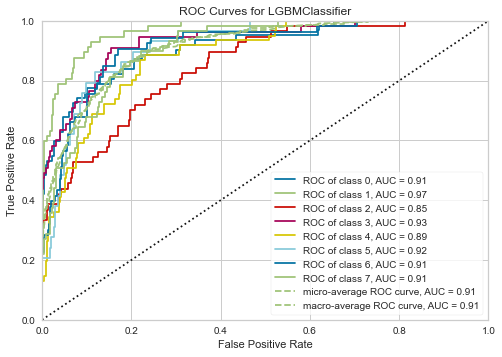

In [30]:
plot_model(model)

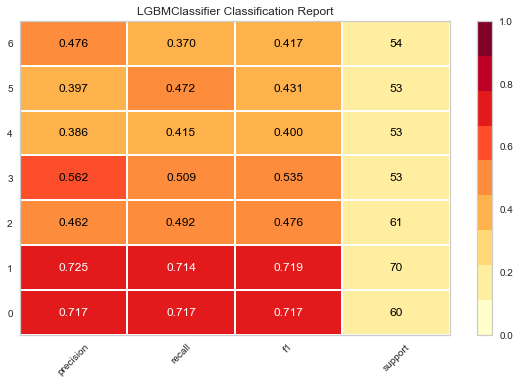

In [41]:
plot_model(model, 'class_report')

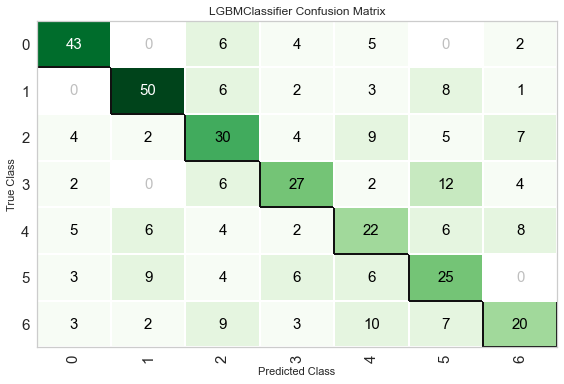

In [42]:
plot_model(model, 'confusion_matrix')

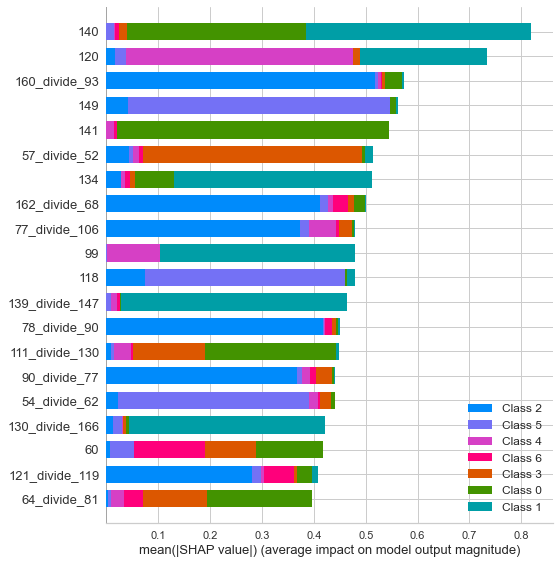

In [43]:
interpret_model(model)

In [44]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5371,0.8570,0.5271,0.5418,0.5378,0.4590,0.4595


In [9]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5911,0.9032,0.5743,0.5804,0.5821,0.5198,0.5209


In [47]:
finalize_model(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
# save_model(model, '../code/voice_emotion_model')
# model = load_model('../code/voice_emotion_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='emotion',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,

<hr>
<br><br>
<div align=right>
    <font size=2>
        Julio Valim &emsp;
    </font>
    <br>
    <font size=1>
        <a href='https://www.linkedin.com/in/juliovalim'>contato /in</a>&emsp;&emsp;
    </font>
</div>